# Projet 2  - Analysez des données de systèmes éducatifs

### Import all the necessary librairies - Importation de toutes les librairies nécessaires

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [3]:
import seaborn as sns
import collections

In [4]:
import inspect

In [5]:
import missingno as msno

In [6]:
%matplotlib inline

In [7]:
# Option pour voir la totalité des requêtes
pd.set_option('display.max_rows', None)

### Import all the necessary data - Importation de toutes les bases de données nécessaires 

In [8]:
country = pd.read_csv('data/EdStatsCountry.csv')
countryseries = pd.read_csv('data/EdStatsCountry-Series.csv')
data = pd.read_csv('data/EdStatsData.csv', )
footnote = pd.read_csv('data/EdStatsFootNote.csv')
series = pd.read_csv('data/EdStatsSeries.csv')
data2 = data.copy() #In case we need it !!!!
## data_decades = data.copy()

### Databases' exploration - Exploration des bases de données

#### Column's names

In [9]:
# Show all databases columns - Montre toutes les colonnes des bases de données
print(country.columns);
print(countryseries.columns);
print(series.columns);
print(footnote.columns);
print(data.columns)

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data', 'Unnamed: 31'],
      dtype='object')
Index(['CountryCode', 'SeriesCode', 'DESCRIPTION', 'Unnamed: 3'], dtype='object')
Index(['Series Code', 'Topic

#### Inside look in those DataBases (DBs)

In [10]:
country.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [11]:
countryseries.tail()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
608,ZAF,SP.POP.GROW,"Data sources : Statistics South Africa, United...",NaN
609,ZMB,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
610,ZMB,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
611,ZWE,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
612,ZWE,SP.POP.GROW,Data sources: United Nations World Population ...,NaN


In [12]:
series.tail() 

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
3660,UIS.XUNIT.USCONST.3.FSGOV,Expenditures,Government expenditure per upper secondary stu...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3661,UIS.XUNIT.USCONST.4.FSGOV,Expenditures,Government expenditure per post-secondary non-...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3662,UIS.XUNIT.USCONST.56.FSGOV,Expenditures,Government expenditure per tertiary student (c...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663,XGDP.23.FSGOV.FDINSTADM.FFD,Expenditures,Government expenditure in secondary institutio...,"Total general (local, regional and central) go...","Total general (local, regional and central) go...",NaN,NaN,NaN,Secondary,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3664,XGDP.56.FSGOV.FDINSTADM.FFD,Expenditures,Government expenditure in tertiary institution...,"Total general (local, regional and central) go...","Total general (local, regional and central) go...",NaN,NaN,NaN,Tertiary,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
footnote.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [14]:
data.tail()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886929,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, m...",SE.ADT.1524.LT.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Common variables between DBs

In [15]:
... print(np.intersect1d(data.columns, country.columns))
... print(np.intersect1d(data.columns, series.columns))
... print(np.intersect1d(data.columns, footnote.columns))
... print(np.intersect1d(data.columns, countryseries.columns))
... print(np.intersect1d(country.columns, countryseries.columns))
# One common variable between data and country : Country Code - Une variable en commun entre data et country : Country Code
# One common variable between data and series : Indicator Name - Une variable en commun entre data et series : Indicator Name
# No common name for the three other comparaison - Aucun nom en commun

['Country Code']
['Indicator Name']
[]
[]
[]


#### Shape of each dataset

In [16]:
print(country.shape);
print(series.shape);
print(countryseries.shape);
print(footnote.shape);
print(data.shape);

(241, 32)
(3665, 21)
(613, 4)
(643638, 5)
(886930, 70)


#### Missing data

In [17]:
# Find the percentage of missing values per columns
# Creation of a function that gives the percentage missing
def missing(x):
    print (round((x.isnull().sum() * 100/ len(x)),2).sort_values(ascending=True))

missing(data)

Country Name        0.00
Country Code        0.00
Indicator Name      0.00
Indicator Code      0.00
2010               72.67
2005               79.24
2000               80.08
2012               83.40
2011               83.54
2009               83.98
2006               84.18
2013               84.50
2007               84.52
2008               84.85
1995               85.19
2015               85.22
2003               85.30
2004               85.48
1990               85.97
2002               86.00
2001               86.07
1999               86.60
2014               87.17
1985               89.82
1980               89.95
1975               90.16
1998               90.43
1994               91.27
1996               91.34
1993               91.45
1992               91.48
1991               91.61
1997               91.72
1970               91.85
2040               94.20
2025               94.20
2090               94.20
2030               94.20
2035               94.20
2080               94.20


In [18]:
# Find the percentage of missing values per rows
#r = n_data.apply(lambda x: x.count(), axis=1)
n_data = data
n_data.isnull().sum(axis=0)

Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
1970              814642
1971              851393
1972              851311
1973              851385
1974              851200
1975              799624
1976              849447
1977              849356
1978              849354
1979              850121
1980              797808
1981              848153
1982              849419
1983              848470
1984              848324
1985              796634
1986              847558
1987              848289
1988              848378
1989              849390
1990              762525
1991              812493
1992              811387
1993              811137
1994              809468
1995              755569
1996              810123
1997              813477
1998              802016
1999              768091
2000              710254
2001              763421
2002              762725
2003              756567
2004              758116
2005              702822


#### Replicated data

In [19]:
print(country.duplicated(keep=False).sum());
print(countryseries.duplicated(keep=False).sum());
print(series.duplicated(keep=False).sum());
print(footnote.duplicated(keep=False).sum());
print(data.duplicated(keep=False).sum());

0
0
0
0
0


No replicated data in `data`

#### Suppression des colonnes non nécéssaires dans les bases de données

In [20]:
country = pd.read_csv('data/EdStatsCountry.csv')
countryseries = pd.read_csv('data/EdStatsCountry-Series.csv')
data = pd.read_csv('data/EdStatsData.csv', )
footnote = pd.read_csv('data/EdStatsFootNote.csv')
series = pd.read_csv('data/EdStatsSeries.csv')

In [21]:
del data['Unnamed: 69']
del footnote['Unnamed: 4']
del country['Unnamed: 31']
del countryseries['Unnamed: 3']
del series['Unnamed: 20']

print(country.columns);
print(countryseries.columns);
print(series.columns);
print(footnote.columns);
print(data.columns)

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data'],
      dtype='object')
Index(['CountryCode', 'SeriesCode', 'DESCRIPTION'], dtype='object')
Index(['Series Code', 'Topic', 'Indicator Name', 'Short d

#### Création de listes - zones, pays, niveau de vie

In [22]:
region_list = set(country['Region'].dropna().tolist());
gdp_list = set(country['Income Group'].dropna().tolist());
list_country = set(country['Short Name'].dropna().tolist());

In [23]:
region_list

{'East Asia & Pacific',
 'Europe & Central Asia',
 'Latin America & Caribbean',
 'Middle East & North Africa',
 'North America',
 'South Asia',
 'Sub-Saharan Africa'}

In [24]:
gdp_list

{'High income: OECD',
 'High income: nonOECD',
 'Low income',
 'Lower middle income',
 'Upper middle income'}

In [25]:
list_country

{'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Arab World',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Channel Islands',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curaçao',
 'Cyprus',
 'Czech Republic',
 "Côte d'Ivoire",
 "Dem. People's Rep. Korea",
 'Dem. Rep. Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'East Asia & Pacific (all income levels)',
 'East Asia & Pacific (developing only)',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Eur

#### Create a clean list with only the countries

In [26]:
list_tot = [*region_list, *gdp_list];
country_list = [x for x in list_country if x not in list_tot];

In [27]:
list_rest = ['Middle East & North Africa (all income levels)', 
             'East Asia & Pacific (developing only)', 
             'Latin America & Caribbean (all income levels)', 
             'Heavily indebted poor countries (HIPC)', 
             'Sub-Saharan Africa (developing only)', 
             'Least developed countries: UN classification', 
             'Low & middle income', 
             'East Asia & Pacific (all income levels)', 
             'Europe & Central Asia (all income levels)', 
             'Europe & Central Asia (developing only)', 
             'Middle East & North Africa (developing only)', 
             'World', 
             'Sub-Saharan Africa (all income levels)', 
             'European Union', 
             'Upper middle income', 
             'High income', 
             'Euro area', 
             'Latin America & Caribbean (developing only)', 
             'Middle East & North Africa (excluding high income)', 
             'Europe & Central Asia (excluding high income)', 
             'East Asia & Pacific (excluding high income)', 
             'Latin America & Caribbean (excluding high income)', 
             'Lower middle income', 
             'OECD members', 
             'Sub-Saharan Africa (excluding high income)', 
             'Middle income', 
             'Arab World', 
             'East Asia & Pacific', 
             'Europe & Central Asia', 
             'Latin America & Caribbean', 
             'Low income', 
             'Middle East & North Africa', 
             'North America', 'South Asia', 
             'Sub-Saharan Africa', 
             #'British Virgin Islands', 
             #'Curacao', 
             #'Nauru', 
             #'Sint Maarten (Dutch part)', 
             #'St. Martin (French part)'
            ]

In [28]:
list_tot = [*list_tot, *list_rest];
country_list = [x for x in list_country if x not in list_tot];
country_list

['Argentina',
 'Belgium',
 'Brazil',
 'Liechtenstein',
 'Angola',
 'Indonesia',
 'Cambodia',
 'Jamaica',
 'São Tomé and Principe',
 'France',
 'Guyana',
 'Turkmenistan',
 'Paraguay',
 'Gabon',
 'Syrian Arab Republic',
 'Nigeria',
 'Ethiopia',
 'Guinea-Bissau',
 'Australia',
 'Thailand',
 'Peru',
 'Zimbabwe',
 'Lebanon',
 'Comoros',
 'Suriname',
 'Hong Kong SAR, China',
 'India',
 'Bulgaria',
 'Kiribati',
 'Seychelles',
 'Vanuatu',
 'South Africa',
 'Serbia',
 'Greece',
 'Swaziland',
 'Mexico',
 'Japan',
 'Mozambique',
 'Myanmar',
 'Hungary',
 'Kuwait',
 'Namibia',
 'St. Vincent and the Grenadines',
 'New Zealand',
 'Barbados',
 'Czech Republic',
 'Mongolia',
 'Iraq',
 'Kazakhstan',
 'Sint Maarten (Dutch part)',
 'Panama',
 'Cabo Verde',
 'Albania',
 'China',
 'Niger',
 'Tajikistan',
 'Gibraltar',
 'Korea',
 'St. Lucia',
 'West Bank and Gaza',
 'American Samoa',
 'Tunisia',
 'Zambia',
 'Germany',
 'Ireland',
 'Madagascar',
 'Solomon Islands',
 'Norway',
 'Micronesia',
 'French Polynesia

In [29]:
print(len(country_list));
print(len(region_list));
print(len(gdp_list));

216
7
5


#### Suppression de lignes non liées au pays

In [30]:
data = data[~data['Country Name'].isin(list_tot)]

In [31]:
data.shape

(795305, 69)

In [32]:
data.sample(50)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
575045,Mongolia,MNG,UIS: Rate of out-of-school children of primary...,UIS.ROFST.H.1.URB,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
534575,Malaysia,MYS,"UIS: Net attendance rate, lower secondary, ric...",UIS.NAR.2.Q5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
334504,Finland,FIN,EGRA: Oral Reading Fluency - Share of students...,LO.EGRA.CWPM.ZERO.HAR.3GRD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183910,Botswana,BWA,DHS: Typology of out-of-school children. Prima...,HH.DHS.OOST.X.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
670284,Puerto Rico,PRI,UIS: Percentage of population age 25+ with som...,UIS.EA.S1.AG25T99.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
537536,Maldives,MDV,"Population, ages 11-17, total",SP.POP.1117.TO.UN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
659492,Philippines,PHL,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.2039.3.MA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.33,0.32,0.30,0.29,0.28,0.26,0.25,0.24,0.23,0.22
240957,Chile,CHL,SABER: (School Autonomy Accountability) Policy...,SABER.SCH.ATNM.GOAL2.LVL2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
476691,Kuwait,KWT,"Barro-Lee: Average years of total schooling, a...",BAR.SCHL.1519.FE,3.8500,NaN,NaN,NaN,NaN,4.33000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
820398,Turkey,TUR,"UIS: Adjusted net attendance rate, primary, fo...",UIS.NARA.1.Q4.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Informations supplémentaires sur data

In [33]:
print(data['Indicator Name'].nunique());
print(data['Indicator Code'].nunique());
print(data['Country Name'].nunique());

3665
3665
217


In [34]:
countryseries['CountryCode'].nunique()

211

### Valeurs manquantes dans les dataframes autre que `data`

In [35]:
print('footnote table : \n\n' ,footnote.isna().sum().sort_values(ascending=False), '\n');
print('series table : \n\n' ,series.isna().sum().sort_values(ascending=False), '\n');
print('countryseries table : \n\n' ,countryseries.isna().sum().sort_values(ascending=False), '\n');
print('country table : \n\n' ,country.isna().sum().sort_values(ascending=False))

footnote table : 

 CountryCode    0
SeriesCode     0
Year           0
DESCRIPTION    0
dtype: int64 

series table : 

 License Type                           3665
Notes from original source             3665
Related indicators                     3665
Other web links                        3665
Unit of measure                        3665
Development relevance                  3662
General comments                       3651
Limitations and exceptions             3651
Statistical concept and methodology    3642
Aggregation method                     3618
Periodicity                            3566
Related source links                   3450
Base Period                            3351
Other notes                            3113
Short definition                       1509
Topic                                     0
Source                                    0
Long definition                           0
Indicator Name                            0
Series Code                               0

### Merge two dataframe

In [36]:
data = data.merge(right = country[['Country Code', 'Region', 'Income Group']], 
                  on='Country Code', how='left')

In [37]:
data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Region', 'Income Group'],
      dtype='object')

In [38]:
data.sample(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2065,2070,2075,2080,2085,2090,2095,2100,Region,Income Group
492623,Mozambique,MOZ,LLECE: Mean performance on the reading scale f...,LO.LLECE.REA6.MA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sub-Saharan Africa,Low income
534155,Northern Mariana Islands,MNP,SABER: (School Autonomy Accountability) Policy...,SABER.SCH.ATNM.GOAL1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,East Asia & Pacific,High income: nonOECD
759628,Uruguay,URY,EGRA: Oral Reading Fluency - Share of students...,LO.EGRA.CWPM.ZERO.CIN.2GRD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Latin America & Caribbean,High income: nonOECD
790894,Zambia,ZMB,"School life expectancy, primary and lower seco...",UIS.SLEN.12.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sub-Saharan Africa,Lower middle income
471513,"Micronesia, Fed. Sts.",FSM,"Population, age 24, male",SP.POP.AG24.MA.UN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,East Asia & Pacific,Lower middle income


### Indicator informations

#### Are there countries with indicators that are missing?

In [39]:
data['total_Amount'] = data.groupby('Country Name', sort=False)['Indicator Code'].transform('count')
data[['Country Name', 'total_Amount']].drop_duplicates().head(5)

,Country Name,total_Amount
0,Afghanistan,3665
3665,Albania,3665
7330,Algeria,3665
10995,American Samoa,3665
14660,Andorra,3665


In [40]:
# filter rows for year does not equal to 3665
isnot_3665 = data[data.total_Amount != 3665]
isnot_3665 = data[data['total_Amount']!=3665]
print(isnot_3665.shape);

(0, 72)


No indicator code is missing from the dataset `data`. 

### Visualisation of the table with only the countries, their region and their group income

#### Create a new table where you have only the country name, the country code, its region and its income group

In [41]:
df = data[['Country Name', 'Country Code', 'Region','Income Group']].drop_duplicates() 

In [42]:
df.shape

(217, 4)

#### Useful function for the visualization part

In [43]:
# Function 
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

#### Nombre de pays par région

In [44]:
# Table - Nombre de pays par région 
df.groupby('Region')[['Country Name']].count()

,Country Name
Region,
East Asia & Pacific,36
Europe & Central Asia,57
Latin America & Caribbean,41
Middle East & North Africa,21
North America,3
South Asia,8
Sub-Saharan Africa,48


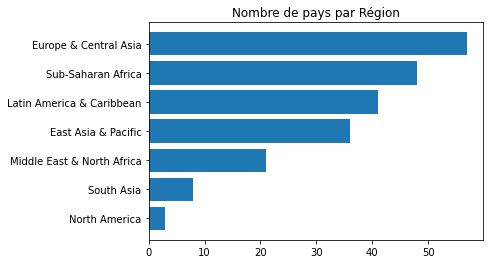

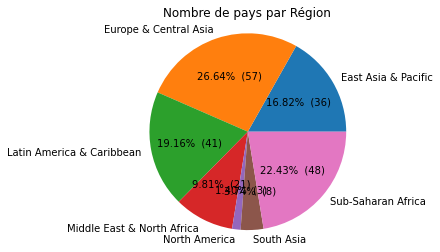

In [45]:
# graph chart
plt.title('Nombre de pays par Région')
#### PIE CHART 
plt.barh(y = df.groupby('Region')[['Country Name']].count().reset_index().sort_values(by='Country Name')['Region'], 
         width = df.groupby('Region')[['Country Name']].count()['Country Name'].sort_values())
plt.show()

# pie chart
repartition = df.groupby('Region')[['Country Name']].count()

fig1, ax1 = plt.subplots()
plt.title('Nombre de pays par Région')
ax1.pie(x=repartition["Country Name"], labels=repartition.index, autopct = make_autopct(repartition["Country Name"]))
#autopct='%1.f%%'
ax1.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#### Nombre de pays par catégorie sociale

In [46]:
df.groupby('Income Group')[['Country Name']].count()

,Country Name
Income Group,
High income: OECD,31
High income: nonOECD,44
Low income,34
Lower middle income,50
Upper middle income,55


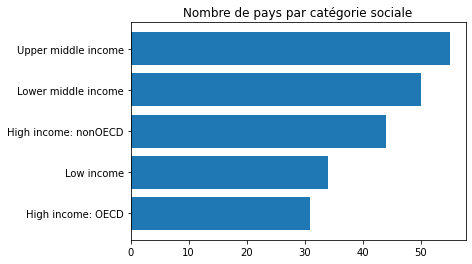

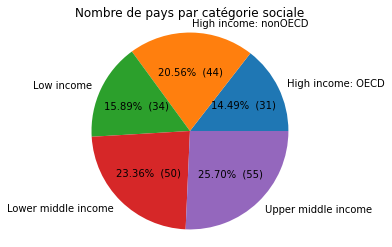

In [47]:
# graph chart
plt.title('Nombre de pays par catégorie sociale')
#### PIE CHART 
plt.barh(y = df.groupby('Income Group')[['Country Name']].count().reset_index().sort_values(by='Country Name')['Income Group'], 
         width = df.groupby('Income Group')[['Country Name']].count()['Country Name'].sort_values())
plt.show()


# pie chart
repartition = df.groupby('Income Group')[['Country Name']].count()

fig1, ax1 = plt.subplots()
plt.title('Nombre de pays par catégorie sociale')
ax1.pie(x=repartition["Country Name"], labels=repartition.index, autopct = make_autopct(repartition["Country Name"]))
#autopct='%1.f%%'
ax1.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#### Catégorie sociale par région

In [48]:
df.groupby(['Income Group', 'Region'])[['Country Name']].count()

Country Name
Income Group         Region                                  
High income: OECD    East Asia & Pacific                    4
                     Europe & Central Asia                 23
                     Latin America & Caribbean              1
                     Middle East & North Africa             1
                     North America                          2
High income: nonOECD East Asia & Pacific                    8
                     Europe & Central Asia                 13
                     Latin America & Caribbean             14
                     Middle East & North Africa             7
                     North America                          1
                     Sub-Saharan Africa                     1
Low income           East Asia & Pacific                    3
                     Europe & Central Asia                  1
                     Latin America & Caribbean              1
                     South Asia                             3
                     Sub-Saharan Africa                    26
Lower middle income  East Asia & Pacific                   12
                     Europe & Central Asia                  7
                     Latin America & Caribbean              7
                     Middle East & North Africa             6
                     South Asia                             4
                     Sub-Saharan Africa                    14
Upper middle income  East Asia & Pacific                    9
                     Europe & Central Asia                 13
                     Latin America & Caribbean             18
                     Middle East & North Africa             7
                     South Asia                             1
                     Sub-Saharan Africa                     7

### Are there indicators that contains nothing but null/NA values ?

#### Nombre total de valeurs manquantes dans la dataframe `data`

In [49]:
print("Il y a", data.isnull().sum().sum(), 'valeurs nulles dans la table `data` sur', data.shape[0]*data.shape[1], ' valeurs, soit', round(data.isnull().sum().sum()/(data.shape[0]*data.shape[1])*100, 2), "% au total.")

Il y a 46922571 valeurs nulles dans la table `data` sur 57261960  valeurs, soit 81.94 % au total.


In [50]:
# table avec le nombre de valeurs manquantes par variables/années
data.isnull().sum()

Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
1970              726724
1971              763592
1972              763676
1973              763873
1974              763719
1975              712228
1976              762094
1977              762022
1978              762026
1979              762835
1980              710621
1981              760991
1982              762261
1983              761392
1984              761286
1985              709902
1986              760952
1987              761688
1988              761793
1989              762821
1990              676220
1991              726269
1992              725426
1993              725349
1994              723999
1995              670193
1996              724768
1997              728860
1998              718455
1999              684671
2000              626901
2001              680110
2002              679446
2003              673292
2004              674860
2005              619634


In [51]:
data.isnull().mean()*100

Country Name       0.000000
Country Code       0.000000
Indicator Name     0.000000
Indicator Code     0.000000
1970              91.376767
1971              96.012473
1972              96.023035
1973              96.047806
1974              96.028442
1975              89.554070
1976              95.824118
1977              95.815065
1978              95.815568
1979              95.917290
1980              89.352010
1981              95.685429
1982              95.845116
1983              95.735850
1984              95.722522
1985              89.261604
1986              95.680525
1987              95.773068
1988              95.786271
1989              95.915529
1990              85.026499
1991              91.319557
1992              91.213560
1993              91.203878
1994              91.034132
1995              84.268677
1996              91.130824
1997              91.645344
1998              90.337041
1999              86.089110
2000              78.825231
2001              85

In [52]:
# Find the percentage of missing values per columns
# Creation of a function that gives the percentage missing
def missing_perc(x):
    print (round((x.isnull().sum() * 100/ len(x)),2).sort_values(ascending=True))
x = missing_perc(data)

Country Name       0.00
Indicator Code     0.00
total_Amount       0.00
Country Code       0.00
Indicator Name     0.00
Region             1.38
Income Group       1.38
2010              70.63
2005              77.91
2000              78.83
2012              82.59
2011              82.72
2009              83.21
2006              83.42
2015              83.75
2007              83.80
2013              83.82
2008              84.17
1995              84.27
2003              84.66
2004              84.86
1990              85.03
2002              85.43
2001              85.52
1999              86.09
2014              86.72
1985              89.26
1980              89.35
1975              89.55
1998              90.34
1994              91.03
1996              91.13
1993              91.20
1992              91.21
1991              91.32
1970              91.38
1997              91.65
2035              93.57
2045              93.57
2050              93.57
2030              93.57
2040            

In [53]:
# Drop all the columns where >85% of the data is missing
colsToKeep = ['Country Name','Country Code', 'Indicator Name', 'Indicator Code', 'Region', 'Income Group','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']
data_clean = data.loc[:,colsToKeep]

<AxesSubplot:>

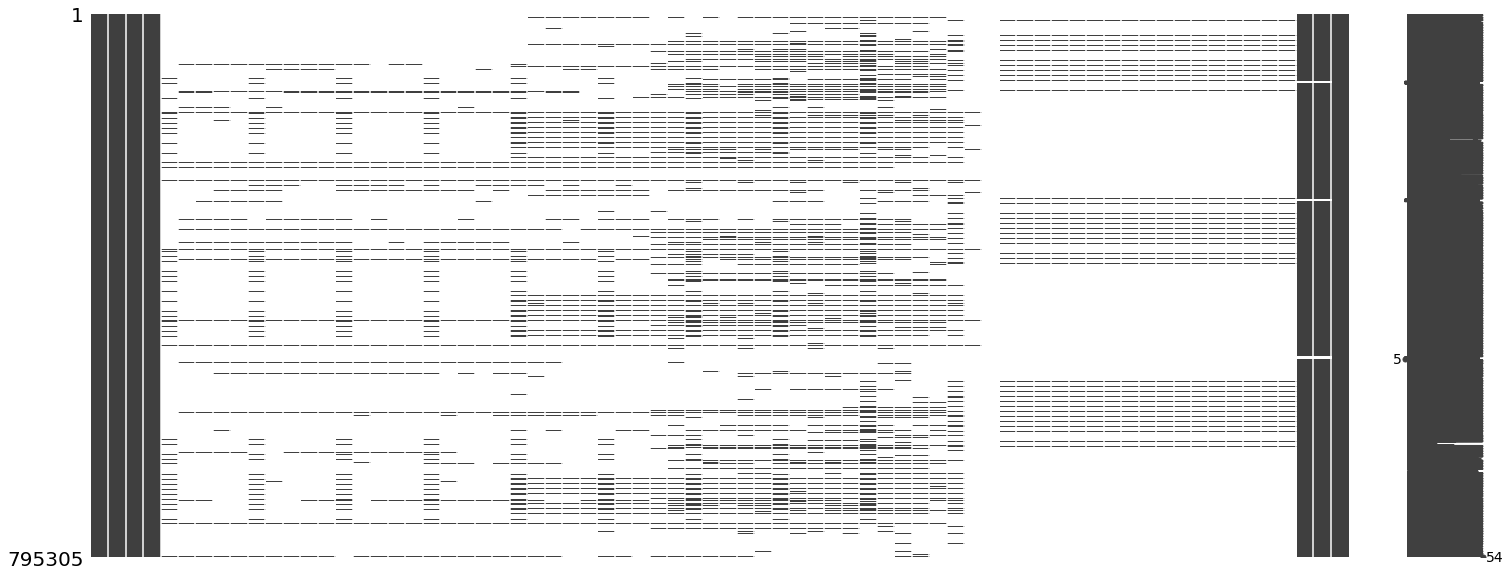

In [54]:
msno.matrix(data)

<AxesSubplot:>

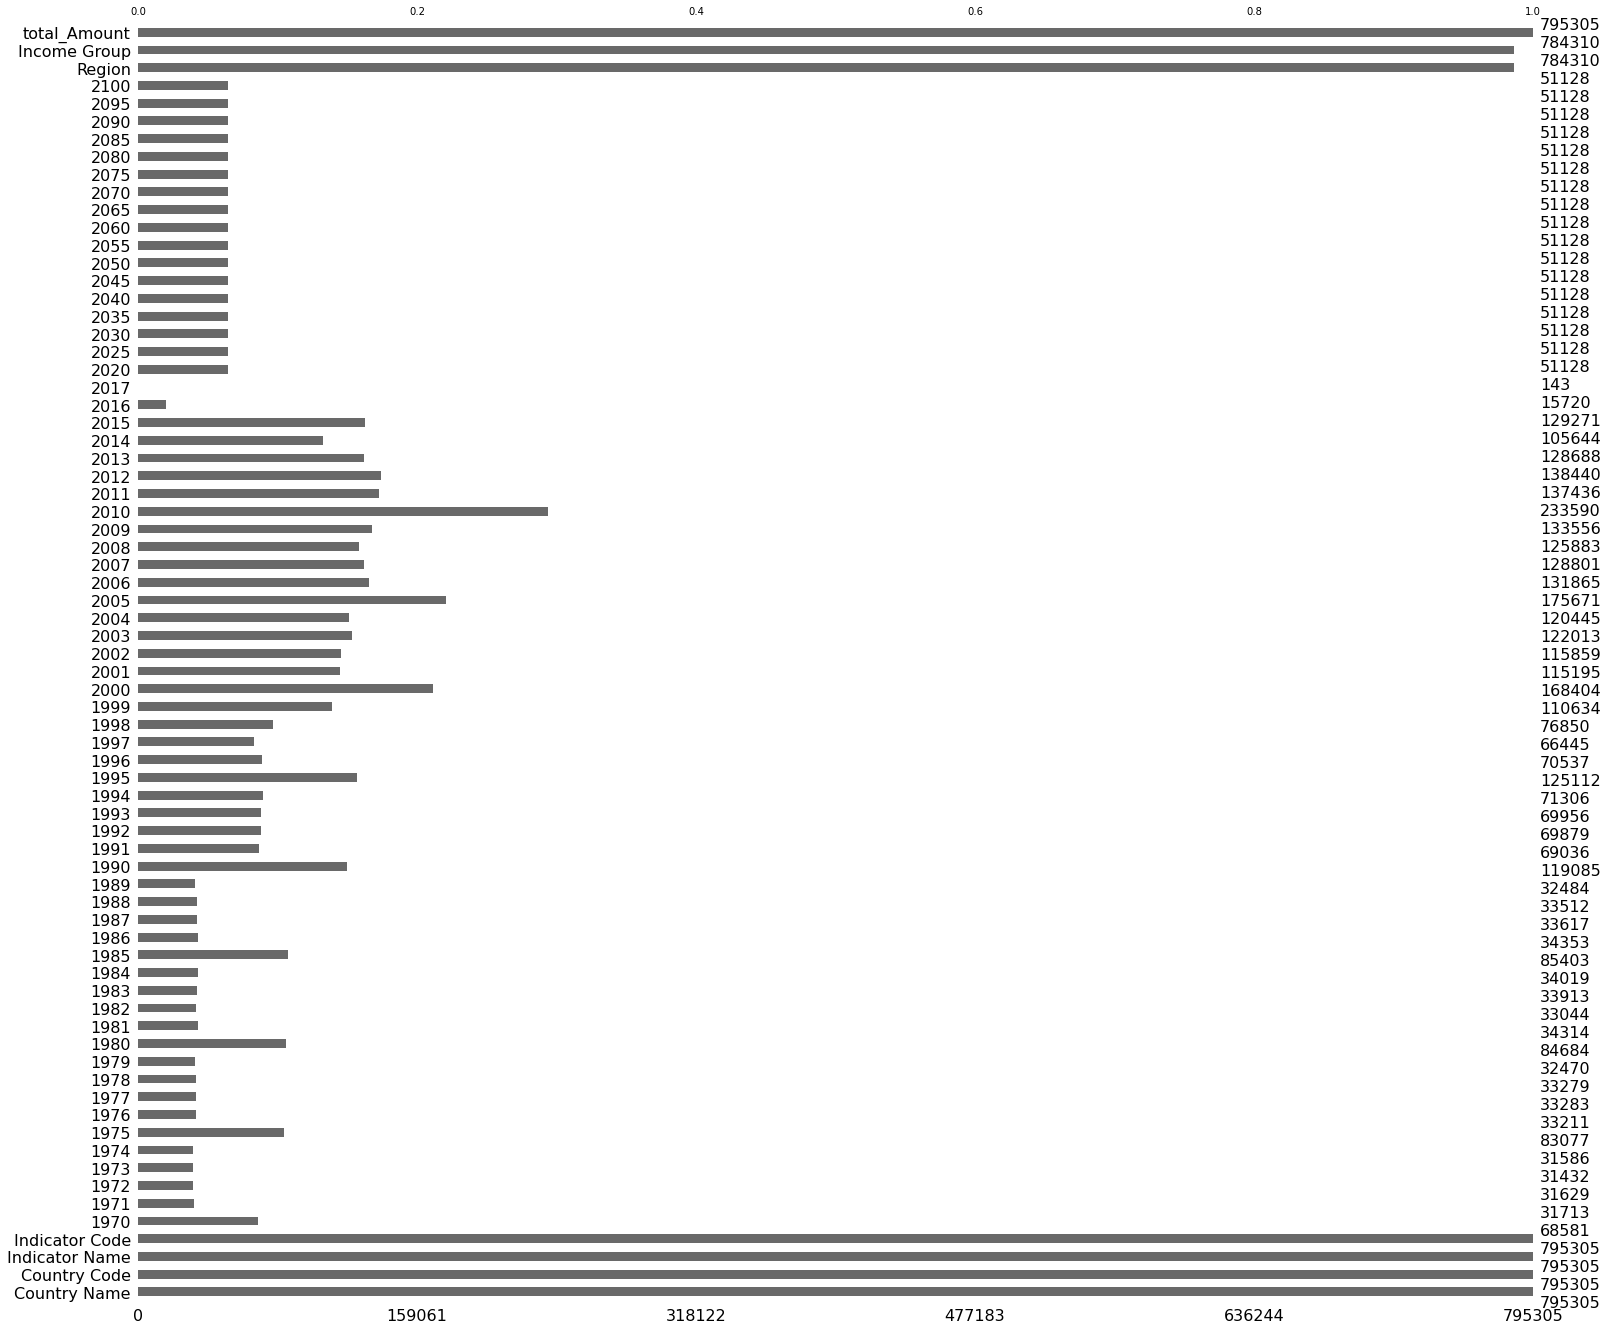

In [55]:
msno.bar(data)

In [56]:
data3 = data.copy()

In [57]:
data3 = data.loc[:,:'2017']

<AxesSubplot:>

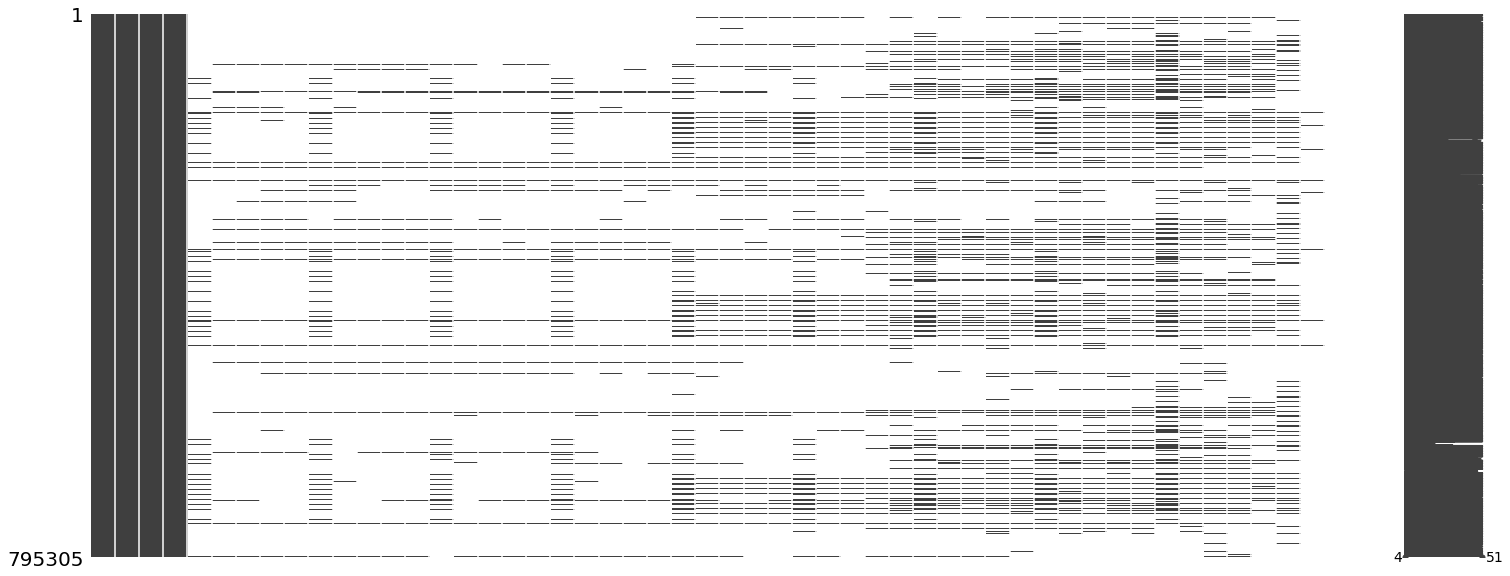

In [58]:
msno.matrix(data3)

## Les indicateurs qui nous intéressent

In [59]:
indicateurs = ['UIS.E.3', # Enrolment in tertiary education (everything) - fac, école ingénieurs, etc.
'UIS.E.4', # Enrolment in the post-secondary education - community college, 
'SP.POP.1524.TO.UN', # population entre 15 et 24 ans, la tranche d'âge qui nous intéressent
'SP.POP.AG20.TO.UN', # population entre 20-29 ans, la tranche d'âge qui nous intéressent
'SP.POP.AG29.TO.UN', # population entre 20-29 ans, la tranche d'âge qui nous intéressent
'SP.POP.AG22.TO.UN', # population entre 20-29 ans, la tranche d'âge qui nous intéressent
'SP.POP.AG24.TO.UN', # population entre 20-29 ans, la tranche d'âge qui nous intéressent
'SP.POP.AG25.TO.UN', # population entre 20-29 ans, la tranche d'âge qui nous intéressent
'SP.POP.1418.TO.UN', #Population dans la tranche 14-18 ans 
'IT.NET.USER.P2', # percentage of people using internet in the country 
'UIS.PTRHC.3', #  ratio élève/prof dans le secondaire 
'UIS.PTRHC.56', # ratio élève/pof dans l'éducation supérieure
'NY.GDP.PCAP.CD', # PIB par habitant
'SE.XPD.TOTL.GD.ZS', # Pourcentage de dépense de l'Etat allant dans l'éducation 
'SE.TER.ENRL', # inscription dans le tertiare
'SP.POP.TOTL',] # population totale 

In [60]:
data_clean[data_clean['Indicator Code'].isin(indicateurs)][['Indicator Name', 'Indicator Code', '2010']].groupby(['Indicator Name', 'Indicator Code']).count().reset_index().sort_values(by='2010',ascending=False)

,Indicator Name,Indicator Code,2010
12,"Population, total",SP.POP.TOTL,215
3,GDP per capita (current US$),NY.GDP.PCAP.CD,203
5,Internet users (per 100 people),IT.NET.USER.P2,202
6,"Population, age 20, total",SP.POP.AG20.TO.UN,181
7,"Population, age 22, total",SP.POP.AG22.TO.UN,181
8,"Population, age 24, total",SP.POP.AG24.TO.UN,181
9,"Population, age 25, total",SP.POP.AG25.TO.UN,181
10,"Population, ages 14-18, total",SP.POP.1418.TO.UN,181
11,"Population, ages 15-24, total",SP.POP.1524.TO.UN,181
2,"Enrolment in upper secondary education, both s...",UIS.E.3,149


## Analyse des projections

In [61]:
data_clean = data[['Country Name', 'Country Code', 'Indicator Name', 
                   'Indicator Code', 'Region','Income Group','2010']]
#data_short[['Indicator Name', '2010']].groupby('Indicator Name').count().sort_values(by='2010',ascending=False)

In [62]:
data_clean.sample(10)

,Country Name,Country Code,Indicator Name,Indicator Code,Region,Income Group,2010
403471,Lesotho,LSO,Barro-Lee: Percentage of female population age...,BAR.SEC.CMPT.4044.FE.ZS,Sub-Saharan Africa,Lower middle income,1.414000e+01
723871,Tunisia,TUN,Percentage of female graduates from tertiary e...,SE.TER.GRAD.SV.FE.ZS,Middle East & North Africa,Upper middle income,NaN
619885,Sierra Leone,SLE,"Barro-Lee: Population in thousands, age 55-59,...",BAR.POP.5559,Sub-Saharan Africa,Low income,1.570000e+02
100747,British Virgin Islands,VGB,PASEC: Distribution of 5th Grade Mathematics S...,LO.PASEC.MAT.P75,NaN,NaN,NaN
731821,Turkmenistan,TKM,"Population, ages 15-64, total",SP.POP.1564.TO,Europe & Central Asia,Upper middle income,3.375067e+06
211942,Ecuador,ECU,TIMSS: Female 8th grade students reaching the ...,LO.TIMSS.SCI8.ADV.FE,Latin America & Caribbean,Upper middle income,NaN
666581,St. Lucia,LCA,UIS: Percentage of population age 25+ with at ...,UIS.EA.7T8.AG25T99.GPI,Latin America & Caribbean,Upper middle income,NaN
315716,Hungary,HUN,Current expenditure as % of total expenditure ...,UIS.XSPENDP.1.FDPUB.FNCUR,Europe & Central Asia,Upper middle income,9.051307e+01
442553,Malaysia,MYS,SABER: (School Autonomy Accountability) Policy...,SABER.SCH.ATNM.GOAL5,East Asia & Pacific,Upper middle income,NaN
610878,Senegal,SEN,"Population, ages 3-5, male",SP.POP.0305.MA.UN,Sub-Saharan Africa,Lower middle income,5.865030e+05


In [63]:
data_clean2 = data[['Country Name', 'Country Code', 'Indicator Name', 
                   'Indicator Code', 'Region','Income Group','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']]
data_clean2[data_clean2['Indicator Code'].isin(indicateurs)][['Country Name','Country Code', 'Indicator Name', 'Indicator Code', 'Region', 'Income Group','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']].groupby(['Indicator Name', 'Indicator Code']).count().reset_index().sort_values(by='2010',ascending=False)

,Indicator Name,Indicator Code,Country Name,Country Code,Region,Income Group,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
12,"Population, total",SP.POP.TOTL,217,217,214,214,215,215,215,215,215,215,215,215,215,215,215,215,214,214
3,GDP per capita (current US$),NY.GDP.PCAP.CD,217,217,214,214,199,199,203,203,204,204,205,204,203,202,203,203,199,200
5,Internet users (per 100 people),IT.NET.USER.P2,217,217,214,214,196,197,199,193,196,198,197,204,203,202,202,204,202,201
6,"Population, age 20, total",SP.POP.AG20.TO.UN,217,217,214,214,190,191,192,192,191,191,187,181,181,181,181,181,181,181
7,"Population, age 22, total",SP.POP.AG22.TO.UN,217,217,214,214,190,191,192,192,191,191,187,181,181,181,181,181,181,181
8,"Population, age 24, total",SP.POP.AG24.TO.UN,217,217,214,214,190,191,192,192,191,191,187,181,181,181,181,181,181,181
9,"Population, age 25, total",SP.POP.AG25.TO.UN,217,217,214,214,190,191,192,192,191,191,187,181,181,181,181,181,181,181
10,"Population, ages 14-18, total",SP.POP.1418.TO.UN,217,217,214,214,190,191,192,192,191,191,187,181,181,181,181,181,181,181
11,"Population, ages 15-24, total",SP.POP.1524.TO.UN,217,217,214,214,190,191,192,192,191,191,187,181,181,181,181,181,181,181
2,"Enrolment in upper secondary education, both s...",UIS.E.3,217,217,214,214,148,149,150,146,157,157,150,155,152,152,149,154,152,140


In [64]:
data_clean[data_clean['Indicator Code'].isin(indicateurs)][['Indicator Name', 'Indicator Code', '2010']].groupby(['Indicator Name', 'Indicator Code']).count().reset_index().sort_values(by='2010',ascending=False)

,Indicator Name,Indicator Code,2010
12,"Population, total",SP.POP.TOTL,215
3,GDP per capita (current US$),NY.GDP.PCAP.CD,203
5,Internet users (per 100 people),IT.NET.USER.P2,202
6,"Population, age 20, total",SP.POP.AG20.TO.UN,181
7,"Population, age 22, total",SP.POP.AG22.TO.UN,181
8,"Population, age 24, total",SP.POP.AG24.TO.UN,181
9,"Population, age 25, total",SP.POP.AG25.TO.UN,181
10,"Population, ages 14-18, total",SP.POP.1418.TO.UN,181
11,"Population, ages 15-24, total",SP.POP.1524.TO.UN,181
2,"Enrolment in upper secondary education, both s...",UIS.E.3,149


In [65]:
# Création de la table finale pour faire les analyses
data_final = data_clean[data_clean['Indicator Code'].isin(indicateurs)][['Country Name', 'Country Code', 'Indicator Name', 
                   'Indicator Code', 'Region','Income Group','2010']]
data_final.sample(10)

,Country Name,Country Code,Indicator Name,Indicator Code,Region,Income Group,2010
713486,Togo,TGO,"Population, ages 14-18, total",SP.POP.1418.TO.UN,Sub-Saharan Africa,Low income,797896.00
691574,Switzerland,CHE,Pupil-teacher ratio in upper secondary educati...,UIS.PTRHC.3,Europe & Central Asia,High income: OECD,NaN
532629,Northern Mariana Islands,MNP,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,East Asia & Pacific,High income: nonOECD,NaN
779374,Virgin Islands (U.S.),VIR,"Population, age 24, total",SP.POP.AG24.TO.UN,Latin America & Caribbean,High income: nonOECD,NaN
177295,Croatia,HRV,Internet users (per 100 people),IT.NET.USER.P2,Europe & Central Asia,High income: nonOECD,56.55
621938,Sierra Leone,SLE,Pupil-teacher ratio in tertiary education (hea...,UIS.PTRHC.56,Sub-Saharan Africa,Low income,NaN
500828,Namibia,NAM,"Population, age 22, total",SP.POP.AG22.TO.UN,Sub-Saharan Africa,Upper middle income,49245.00
354222,Jamaica,JAM,"Population, age 20, total",SP.POP.AG20.TO.UN,Latin America & Caribbean,Upper middle income,53405.00
57357,Bangladesh,BGD,"Population, age 20, total",SP.POP.AG20.TO.UN,South Asia,Low income,3323350.00
555809,Papua New Guinea,PNG,"Population, age 24, total",SP.POP.AG24.TO.UN,East Asia & Pacific,Lower middle income,116679.00


## Partie analyse

In [66]:
# Description rapide des indicateurs (max, min, mean, etc.)
description = np.round(data_final.groupby('Indicator Name').describe(), 2)
description

2010               \
                                                    count         mean   
Indicator Name                                                           
Enrolment in post-secondary non-tertiary educat...   70.0     43324.54   
Enrolment in tertiary education, all programmes...  140.0   1116438.96   
Enrolment in upper secondary education, both se...  149.0   1434138.54   
GDP per capita (current US$)                        203.0     15407.47   
Government expenditure on education as % of GDP...  128.0         4.70   
Internet users (per 100 people)                     202.0        34.26   
Population, age 20, total                           181.0    673860.57   
Population, age 22, total                           181.0    670755.15   
Population, age 24, total                           181.0    648155.85   
Population, age 25, total                           181.0    635104.15   
Population, ages 14-18, total                       181.0   3352171.27   
Population, ages 15-24, total                       181.0   6685105.94   
Population, total                                   215.0  32127247.31   
Pupil-teacher ratio in tertiary education (head...   99.0        16.49   
Pupil-teacher ratio in upper secondary educatio...   78.0        14.74   

                                                                            \
                                                             std       min   
Indicator Name                                                               
Enrolment in post-secondary non-tertiary educat...  8.309482e+04     90.00   
Enrolment in tertiary education, all programmes...  3.644336e+06      5.00   
Enrolment in upper secondary education, both se...  5.525380e+06   1221.00   
GDP per capita (current US$)                        2.316037e+04    231.19   
Government expenditure on education as % of GDP...  1.940000e+00      1.20   
Internet users (per 100 people)                     2.742000e+01      0.00   
Population, age 20, total                           2.493329e+06   1330.00   
Population, age 22, total                           2.513712e+06   1251.00   
Population, age 24, total                           2.392130e+06   1112.00   
Population, age 25, total                           2.322069e+06   1045.00   
Population, ages 14-18, total                       1.214954e+07   7222.00   
Population, ages 15-24, total                       2.454837e+07  13299.00   
Population, total                                   1.282318e+08  10531.00   
Pupil-teacher ratio in tertiary education (head...  8.080000e+00      5.24   
Pupil-teacher ratio in upper secondary educatio...  6.420000e+00      5.49   

                                                                           \
                                                          25%         50%   
Indicator Name                                                              
Enrolment in post-secondary non-tertiary educat...    1891.00    13251.50   
Enrolment in tertiary education, all programmes...   48966.00   195431.50   
Enrolment in upper secondary education, both se...   48999.00   229661.00   
GDP per capita (current US$)                          1484.82     5411.88   
Government expenditure on education as % of GDP...       3.48        4.57   
Internet users (per 100 people)                          8.09       30.32   
Population, age 20, total                            52370.00   130209.00   
Population, age 22, total                            49956.00   126947.00   
Population, age 24, total                            47998.00   127504.00   
Population, age 25, total                            46938.00   128001.00   
Population, ages 14-18, total                       251915.00   675660.00   
Population, ages 15-24, total                       515960.00  1309299.00   
Population, total                                   798851.00  6164626.00   
Pupil-teacher ratio in tertiary education (head...      11.12       15.40   
Pupil-

In [67]:
## indicateur temporelles pour internet 
## Indicateur internet: tubes où se baladent 

In [68]:
data_clean.sample(5)

,Country Name,Country Code,Indicator Name,Indicator Code,Region,Income Group,2010
370467,Kiribati,KIR,Barro-Lee: Percentage of female population age...,BAR.TER.CMPT.2529.FE.ZS,East Asia & Pacific,Lower middle income,NaN
25956,Argentina,ARG,Barro-Lee: Percentage of female population age...,BAR.SEC.ICMP.2529.FE.ZS,Latin America & Caribbean,Upper middle income,72.730000
465462,Mexico,MEX,"Adjusted net enrolment rate, primary, male (%)",SE.PRM.TENR.MA,Latin America & Caribbean,Upper middle income,95.976219
176052,Croatia,HRV,All staff compensation as % of total expenditu...,UIS.XSPENDP.3.FDPUB.FNS,Europe & Central Asia,High income: nonOECD,NaN
749184,United Arab Emirates,ARE,MICS: Average years of schooling by age group....,HH.MICS.YRS.1519.M,Middle East & North Africa,High income: nonOECD,NaN


In [69]:
data_clean2.sample(5)

,Country Name,Country Code,Indicator Name,Indicator Code,Region,Income Group,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
84120,Bhutan,BTN,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.25UP.1.MA,South Asia,Lower middle income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,NaN,NaN,NaN
546677,Palau,PLW,DHS: Net intake rate for the first grade of pr...,HH.DHS.NIR.1.Q1,East Asia & Pacific,Upper middle income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
403259,Lesotho,LSO,Africa Dataset: Ratio of teacher training grad...,UIS.AFR.GTCTR.1.F,Sub-Saharan Africa,Lower middle income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.63189,NaN
683495,Swaziland,SWZ,PASEC: Distribution of 6th grade reading score...,LO.PASEC.REA.6.P1,Sub-Saharan Africa,Lower middle income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50830,"Bahamas, The",BHS,"UIS: Net attendance rate, primary, richest qui...",UIS.NAR.1.Q5.M,Latin America & Caribbean,High income: nonOECD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
min_internet = np.min(data_clean2[data_clean2['Indicator Name']=='Internet users (per 100 people)'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']], axis=0)

In [71]:
max_internet = np.max(data_clean2[data_clean2['Indicator Name']=='Internet users (per 100 people)'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']], axis=0)

In [72]:
mean_internet = np.mean(data_clean2[data_clean2['Indicator Name']=='Internet users (per 100 people)'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']], axis=0)

No handles with labels found to put in legend.


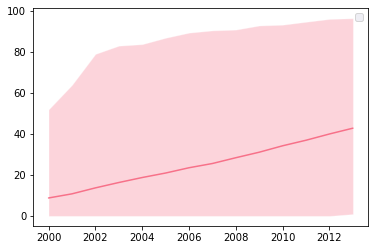

In [73]:
# qu'avec les données normalisées
fig, ax = plt.subplots()
clrs = sns.color_palette("husl", 5)
with sns.axes_style("darkgrid"):
    epochs = list(range(2000,2014))
    ax.plot(epochs, mean_internet, c=clrs[0])
    ax.fill_between(epochs, min_internet, max_internet ,alpha=0.3, facecolor=clrs[0])
    ax.legend()

In [74]:
data_clean2[data_clean2['Indicator Name']=='Internet users (per 100 people)'][['Country Name','2010']].sort_values(ascending=False, by = '2010').head(5)

,Country Name,2010
536465,Norway,93.39
320230,Iceland,93.39
510810,Netherlands,90.72
422850,Luxembourg,90.62
686730,Sweden,90.00


In [75]:
data_clean2[data_clean2['Indicator Name']=='Internet users (per 100 people)'][['Country Name','2010']].sort_values(ascending=True, by = '2010').head(5)

,Country Name,2010
375205,"Korea, Dem. People’s Rep.",0.00
496150,Myanmar,0.25
620760,Sierra Leone,0.58
224940,Eritrea,0.61
162635,"Congo, Dem. Rep.",0.72


<ipython-input-76-c40be0287a87>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x_norway = data_clean2[data_clean2['Indicator Name']=='Internet users (per 100 people)'][data_clean['Country Name']=='Norway'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']].values.flatten()
<ipython-input-76-c40be0287a87>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x_iceland = data_clean2[data_clean2['Indicator Name']=='Internet users (per 100 people)'][data_clean['Country Name']=='Iceland'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']].values.flatten()
<ipython-input-76-c40be0287a87>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x_netherlands = data_clean2[data_clean2['Indicator Name']=='Internet users (per 100 people)'][data_clean['Country Name']=='Netherlands'][['2000','2001','2002','2003','20

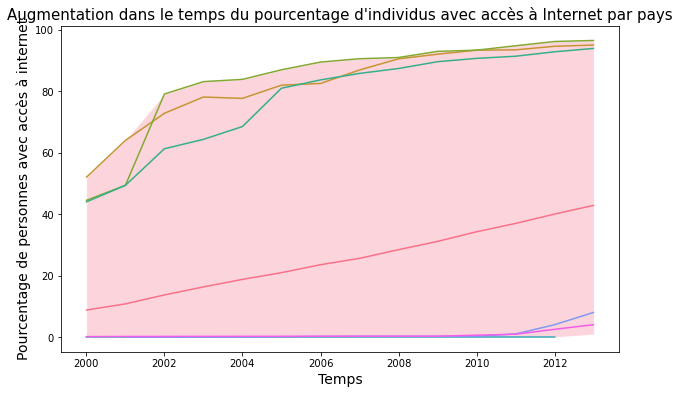

In [76]:
# internet indicator

# 3 meilleurs
x_norway = data_clean2[data_clean2['Indicator Name']=='Internet users (per 100 people)'][data_clean['Country Name']=='Norway'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']].values.flatten()
x_iceland = data_clean2[data_clean2['Indicator Name']=='Internet users (per 100 people)'][data_clean['Country Name']=='Iceland'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']].values.flatten()
x_netherlands = data_clean2[data_clean2['Indicator Name']=='Internet users (per 100 people)'][data_clean['Country Name']=='Netherlands'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']].values.flatten()
# 3 pires
x_nkorea = data_clean2[data_clean2['Indicator Name']=='Internet users (per 100 people)'][data_clean['Country Name']=='Korea, Dem. People’s Rep.'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']].values.flatten()
x_myanmar = data_clean2[data_clean2['Indicator Name']=='Internet users (per 100 people)'][data_clean['Country Name']=='Myanmar'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']].values.flatten()
x_sierra = data_clean2[data_clean2['Indicator Name']=='Internet users (per 100 people)'][data_clean['Country Name']=='Sierra Leone'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']].values.flatten()
# qu'avec les données normalisées



#fig, ax = plt.subplots()
plt.figure(figsize = (10,6))
ax = plt.gca()
fig.set_size_inches(18.5, 10.5, forward=True)
clrs = sns.color_palette("husl", 7) # 5 couleurs
with sns.axes_style("darkgrid"):
    epochs = list(range(2000,2014))
    ax.plot(epochs, mean_internet, c=clrs[0]) #clrs couleurs
    ax.plot(epochs, x_norway, c=clrs[1])
    ax.plot(epochs, x_iceland, c=clrs[2])
    ax.plot(epochs, x_netherlands, c=clrs[3])
    ax.plot(epochs, x_nkorea, c=clrs[4])
    ax.plot(epochs, x_myanmar, c=clrs[5])
    ax.plot(epochs, x_sierra, c=clrs[6])
    ax.fill_between(epochs, min_internet, max_internet ,alpha=0.3, facecolor=clrs[0])
    #ax.legend(loc='upper left', frameon=False)
    #handles, labels = ax.get_legend_handles_labels()
    #fig.legend(handles, labels, loc='upper center')
plt.title('Augmentation dans le temps du pourcentage d\'individus avec accès à Internet par pays', size=15)
plt.xlabel('Temps', size =14)
plt.ylabel('Pourcentage de personnes avec accès à internet', size = 14)
plt.show()

In [77]:
data_clean2[data_clean2['Indicator Code']=='UIS.PTRHC.3'][['Country Name','2010']].sort_values(ascending=True, by = '2010').head(5)

,Country Name,2010
79519,Bermuda,5.49173
574294,Portugal,6.83465
424029,Luxembourg,6.87772
101509,British Virgin Islands,7.04301
178474,Croatia,7.04985


In [78]:
data_clean2[data_clean2['Indicator Code']=='UIS.PTRHC.3'][['Country Name','2010']].sort_values(ascending=False, by = '2010').head(5)

,Country Name,2010
226119,Eritrea,35.265282
522984,Nicaragua,34.714489
233449,Ethiopia,32.571522
497329,Myanmar,28.300390
207794,Dominican Republic,27.199381


<ipython-input-79-af55dd3af3a0>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x_Bermuda = data_clean2[data_clean2['Indicator Code']=='UIS.PTRHC.3'][data_clean['Country Name']=='Bermuda'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']].values.flatten()
<ipython-input-79-af55dd3af3a0>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x_Portugal = data_clean2[data_clean2['Indicator Code']=='UIS.PTRHC.3'][data_clean['Country Name']=='Portugal'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']].values.flatten()
<ipython-input-79-af55dd3af3a0>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x_Luxembourg = data_clean2[data_clean2['Indicator Code']=='UIS.PTRHC.3'][data_clean['Country Name']=='Luxembourg'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012

NameError: name 'handles' is not defined

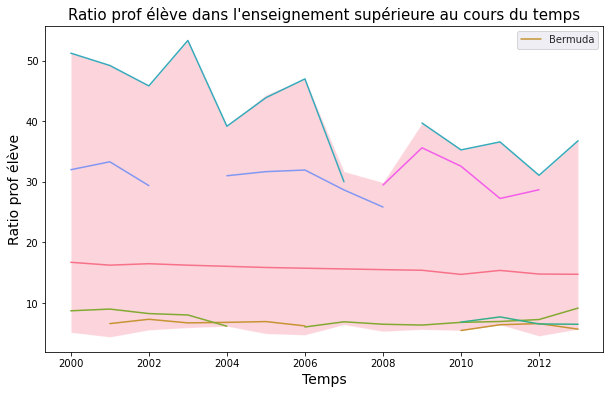

In [79]:
# ratio prof/élève indicator - tertiary education
min_ratioPupilTeacher = np.min(data_clean2[data_clean2['Indicator Code']=='UIS.PTRHC.3'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']], axis=0)
max_ratioPupilTeacher = np.max(data_clean2[data_clean2['Indicator Code']=='UIS.PTRHC.3'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']], axis=0)
mean_ratioPupilTeacher = np.mean(data_clean2[data_clean2['Indicator Code']=='UIS.PTRHC.3'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']], axis=0)
# 3 meilleurs
x_Bermuda = data_clean2[data_clean2['Indicator Code']=='UIS.PTRHC.3'][data_clean['Country Name']=='Bermuda'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']].values.flatten()
x_Portugal = data_clean2[data_clean2['Indicator Code']=='UIS.PTRHC.3'][data_clean['Country Name']=='Portugal'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']].values.flatten()
x_Luxembourg = data_clean2[data_clean2['Indicator Code']=='UIS.PTRHC.3'][data_clean['Country Name']=='Luxembourg'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']].values.flatten()
# 3 pires
x_Eritrea = data_clean2[data_clean2['Indicator Code']=='UIS.PTRHC.3'][data_clean['Country Name']=='Eritrea'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']].values.flatten()
x_Nicaragua = data_clean2[data_clean2['Indicator Code']=='UIS.PTRHC.3'][data_clean['Country Name']=='Nicaragua'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']].values.flatten()
x_Ethiopia = data_clean2[data_clean2['Indicator Code']=='UIS.PTRHC.3'][data_clean['Country Name']=='Ethiopia'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']].values.flatten()
# qu'avec les données normalisées

#fig, ax = plt.subplots()
plt.figure(figsize = (10,6))
ax = plt.gca()
fig.set_size_inches(18.5, 10.5, forward=True)
clrs = sns.color_palette("husl", 7) # 5 couleurs
with sns.axes_style("darkgrid"):
    epochs = list(range(2000,2014))
    ax.plot(epochs, mean_ratioPupilTeacher, c=clrs[0]) #clrs couleurs
    ax.plot(epochs, x_Bermuda, c=clrs[1], label = "Bermuda")
    ax.legend()
    ax.plot(epochs, x_Portugal, c=clrs[2])
    ax.plot(epochs, x_Luxembourg, c=clrs[3])
    ax.plot(epochs, x_Eritrea, c=clrs[4])
    ax.plot(epochs, x_Nicaragua, c=clrs[5])
    ax.plot(epochs, x_Ethiopia, c=clrs[6])
    ax.fill_between(epochs, min_ratioPupilTeacher, max_ratioPupilTeacher ,alpha=0.3, facecolor=clrs[0])
    #ax.legend()
    
   
    #ax.legend()
    #ax.legend(loc='upper left', frameon=False)

#handles = [epochs]    
#handles = [x_Bermuda, x_Portugal,x_Luxembourg,x_Eritrea,x_Nicaragua,x_Ethiopia]
labels = ["x_Bermuda", "x_Portugal","x_Luxembourg","x_Eritrea","x_Nicaragua","x_Ethiopia"]
plt.title('Ratio prof élève dans l\'enseignement supérieure au cours du temps', size=15)
plt.xlabel('Temps', size =14)
plt.ylabel('Ratio prof élève', size = 14)
#ax.legend(loc='upper left', frameon=False)
ax.legend(handles, labels, loc='upper center')
plt.show()

In [ ]:
#La liste pour la semaine prochaine:
#-- Faire la même chose avec les autres indicateurs normalisées
#-- nombre total e de la popultaion -- indicateur normalisé
#-- autres types --niveaeu revenu et richesse
#--  faire trois datasets différents pour les trois types de classifications
#-- courbe à chaque fois
#-- on reverra un classement pour un investissement. 

In [ ]:
data_clean2[data_clean2['Indicator Code']=='UIS.PTRHC.56'][['Country Name','2010']].sort_values(ascending=True, by = '2010').head(5)

In [ ]:
data_clean2[data_clean2['Indicator Code']=='UIS.PTRHC.56'][['Country Name','2010']].sort_values(ascending=False, by = '2010').head(5)

In [ ]:
# ratio prof/élève indicator - secondary education
min_ratioPupilTeacher2 = np.min(data_clean2[data_clean2['Indicator Code']=='UIS.PTRHC.56'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']], axis=0)
max_ratioPupilTeacher2 = np.max(data_clean2[data_clean2['Indicator Code']=='UIS.PTRHC.56'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']], axis=0)
mean_ratioPupilTeacher2 = np.mean(data_clean2[data_clean2['Indicator Code']=='UIS.PTRHC.56'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']], axis=0)
# 3 meilleurs
x_Cuba = data_clean2[data_clean2['Indicator Code']=='UIS.PTRHC.56'][data_clean['Country Name']=='Cuba'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']].values.flatten()
x_Luxembourg = data_clean2[data_clean2['Indicator Code']=='UIS.PTRHC.56'][data_clean['Country Name']=='Luxembourg'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']].values.flatten()
x_Switzerland = data_clean2[data_clean2['Indicator Code']=='UIS.PTRHC.56'][data_clean['Country Name']=='Switzerland'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']].values.flatten()
# 3 pires
x_Cameroon = data_clean2[data_clean2['Indicator Code']=='UIS.PTRHC.56'][data_clean['Country Name']=='Cameroon'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']].values.flatten()
x_SriLanka = data_clean2[data_clean2['Indicator Code']=='UIS.PTRHC.56'][data_clean['Country Name']=='Sri Lanka'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']].values.flatten()
x_Mauritania = data_clean2[data_clean2['Indicator Code']=='UIS.PTRHC.56'][data_clean['Country Name']=='Mauritania'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']].values.flatten()
# qu'avec les données normalisées


#fig, ax = plt.subplots()
plt.figure(figsize = (10,6))
ax = plt.gca()
fig.set_size_inches(18.5, 10.5, forward=True)
clrs = sns.color_palette("husl", 7) # 5 couleurs
with sns.axes_style("darkgrid"):
    epochs = list(range(2000,2014))
    ax.plot(epochs, mean_ratioPupilTeacher2, c=clrs[0]) #clrs couleurs
    ax.plot(epochs, x_Cuba, c=clrs[1])
    ax.plot(epochs, x_Luxembourg, c=clrs[2])
    ax.plot(epochs, x_Switzerland, c=clrs[3])
    ax.plot(epochs, x_Cameroon, c=clrs[4])
    ax.plot(epochs, x_SriLanka, c=clrs[5])
    ax.plot(epochs, x_Mauritania, c=clrs[6])
    ax.fill_between(epochs, min_ratioPupilTeacher2, max_ratioPupilTeacher2 ,alpha=0.3, facecolor=clrs[0])
    #ax.legend(loc='upper left', frameon=False)
    #handles, labels = ax.get_legend_handles_labels()
    #fig.legend(handles, labels, loc='upper center')
plt.title('Ratio prof élève dans l\'enseignement secondaire au cours du temps', size=15)
plt.xlabel('Temps', size =14)
plt.ylabel('Ratio prof élève', size = 14)
plt.show()

In [ ]:
data_clean2[data_clean2['Indicator Code']=='UIS.E.3'][['Country Name','2010']].sort_values(ascending=True, by = '2010').head(5)
data_clean2[data_clean2['Indicator Code']=='UIS.E.3'][['Country Name','2010']].sort_values(ascending=False, by = '2010').head(5)

In [ ]:
print(data_clean2[data_clean2['Indicator Code']=='SE.XPD.TOTL.GD.ZS'][['Country Name','2010']].sort_values(ascending=False, by = '2010').head(5));
print()
print(data_clean2[data_clean2['Indicator Code']=='SE.XPD.TOTL.GD.ZS'][['Country Name','2010']].sort_values(ascending=True, by = '2010').head(5))

In [ ]:
# ¨Pourcentage du pib qui part dans l'éducation 
min_govhelp = np.min(data_clean2[data_clean2['Indicator Code']=='SE.XPD.TOTL.GD.ZS'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']], axis=0)
max_govhelp = np.max(data_clean2[data_clean2['Indicator Code']=='SE.XPD.TOTL.GD.ZS'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']], axis=0)
mean_govhelp = np.mean(data_clean2[data_clean2['Indicator Code']=='SE.XPD.TOTL.GD.ZS'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']], axis=0)
# 3 meilleurs
x_Cuba = data_clean2[data_clean2['Indicator Code']=='SE.XPD.TOTL.GD.ZS'][data_clean['Country Name']=='Cuba'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']].values.flatten()
x_Timor = data_clean2[data_clean2['Indicator Code']=='SE.XPD.TOTL.GD.ZS'][data_clean['Country Name']=='Timor-Leste'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']].values.flatten()
x_Solomon = data_clean2[data_clean2['Indicator Code']=='SE.XPD.TOTL.GD.ZS'][data_clean['Country Name']=='Solomon Islands'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']].values.flatten()
# 3 pires
x_CentrAf = data_clean2[data_clean2['Indicator Code']=='SE.XPD.TOTL.GD.ZS'][data_clean['Country Name']=='Central African Republic'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']].values.flatten()
x_Monaco = data_clean2[data_clean2['Indicator Code']=='SE.XPD.TOTL.GD.ZS'][data_clean['Country Name']=='Monaco'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']].values.flatten()
x_Cambodia = data_clean2[data_clean2['Indicator Code']=='SE.XPD.TOTL.GD.ZS'][data_clean['Country Name']=='Cambodia'][['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']].values.flatten()
# qu'avec les données normalisées


#fig, ax = plt.subplots()
plt.figure(figsize = (10,6))
ax = plt.gca()
fig.set_size_inches(18.5, 10.5, forward=True)
clrs = sns.color_palette("husl", 7) # 5 couleurs
with sns.axes_style("darkgrid"):
    epochs = list(range(2000,2014))
    ax.plot(epochs, mean_govhelp, c=clrs[0]) #clrs couleurs
    ax.plot(epochs, x_Cuba, c=clrs[1])
    ax.plot(epochs, x_Timor, c=clrs[2])
    ax.plot(epochs, x_Solomon, c=clrs[3])
    ax.plot(epochs, x_CentrAf, c=clrs[4])
    ax.plot(epochs, x_Monaco, c=clrs[5])
    ax.plot(epochs, x_Cambodia, c=clrs[6])
    ax.fill_between(epochs, min_govhelp, max_govhelp ,alpha=0.3, facecolor=clrs[0])
    #ax.legend(loc='upper left', frameon=False)
    #handles, labels = ax.get_legend_handles_labels()
    #fig.legend(handles, labels, loc='upper center')
plt.title('Pourcentage du PiB qui part dans l\'éducation au cours du temps', size=15)
plt.xlabel('Temps', size =14)
plt.ylabel('Pourcentage du PIB utilisé à des fins éducatifs', size = 14)
plt.show()

In [80]:
data_clean2.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,Region,Income Group,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,South Asia,Low income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.059870,NaN,NaN,NaN,NaN,NaN,47.436790
1,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,South Asia,Low income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.223100,NaN,NaN,NaN,NaN,NaN,34.073261
2,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,South Asia,Low income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.379130,NaN,NaN,NaN,NaN,NaN,0.567060
3,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,South Asia,Low income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.152851,NaN,NaN,NaN,NaN,NaN,60.087059
4,Afghanistan,AFG,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,South Asia,Low income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
df= data_clean2.groupby(['Indicator Name'])[['2010', '2011', '2012', '2013', '2000', '2005']].mean()
df = df.T

In [85]:
df

Indicator Name,"Adjusted net enrolment rate, lower secondary, both sexes (%)","Adjusted net enrolment rate, lower secondary, female (%)","Adjusted net enrolment rate, lower secondary, gender parity index (GPI)","Adjusted net enrolment rate, lower secondary, male (%)","Adjusted net enrolment rate, primary, both sexes (%)","Adjusted net enrolment rate, primary, female (%)","Adjusted net enrolment rate, primary, gender parity index (GPI)","Adjusted net enrolment rate, primary, male (%)","Adjusted net enrolment rate, upper secondary, both sexes (%)","Adjusted net enrolment rate, upper secondary, female (%)",...,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Male,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total,"Youth illiterate population, 15-24 years, % female","Youth illiterate population, 15-24 years, both sexes (number)","Youth illiterate population, 15-24 years, female (number)","Youth illiterate population, 15-24 years, male (number)","Youth literacy rate, population 15-24 years, both sexes (%)","Youth literacy rate, population 15-24 years, female (%)","Youth literacy rate, population 15-24 years, gender parity index (GPI)","Youth literacy rate, population 15-24 years, male (%)"
2010,72.862527,73.449827,1.030977,72.028427,91.731990,90.361032,0.986534,91.226299,44.446078,45.906049,...,3988.964819,7497.319036,48.697407,5.523427e+05,322819.063830,229523.723404,90.536594,89.468848,0.961715,91.663717
2011,73.736724,74.574172,1.029108,72.632562,91.004207,89.582031,0.982007,90.806755,48.107520,49.315215,...,NaN,NaN,47.448150,1.142523e+06,655438.526316,487084.315789,93.296811,92.324230,0.973984,94.268406
2012,72.708466,73.575915,1.034030,71.553975,92.018172,91.073525,0.991613,91.579644,47.454504,49.046562,...,NaN,NaN,50.879710,6.301399e+05,382469.512195,247670.439024,90.131609,88.686264,0.952293,91.669928
2013,74.414087,75.297151,1.034389,73.253505,91.965376,91.565999,0.991722,91.879806,58.217231,59.701400,...,NaN,NaN,49.390027,6.592913e+05,383651.827586,275639.379310,91.527782,90.566786,0.969444,92.598086
2000,64.795343,65.724139,1.032029,63.220138,86.402474,83.458191,0.960980,85.623668,29.254170,31.041777,...,NaN,NaN,52.363595,4.011200e+05,227308.372093,173811.627907,85.842453,83.319194,0.926043,88.632322
2005,69.891442,69.809220,1.024334,68.059980,89.514215,87.545646,0.981533,88.715534,39.248729,41.857115,...,NaN,NaN,52.625628,1.384991e+06,867962.550000,517028.000000,84.242527,81.269143,0.901109,87.320620


In [92]:
df = pd.DataFrame(df)
df

Indicator Name,"Adjusted net enrolment rate, lower secondary, both sexes (%)","Adjusted net enrolment rate, lower secondary, female (%)","Adjusted net enrolment rate, lower secondary, gender parity index (GPI)","Adjusted net enrolment rate, lower secondary, male (%)","Adjusted net enrolment rate, primary, both sexes (%)","Adjusted net enrolment rate, primary, female (%)","Adjusted net enrolment rate, primary, gender parity index (GPI)","Adjusted net enrolment rate, primary, male (%)","Adjusted net enrolment rate, upper secondary, both sexes (%)","Adjusted net enrolment rate, upper secondary, female (%)",...,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Male,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total,"Youth illiterate population, 15-24 years, % female","Youth illiterate population, 15-24 years, both sexes (number)","Youth illiterate population, 15-24 years, female (number)","Youth illiterate population, 15-24 years, male (number)","Youth literacy rate, population 15-24 years, both sexes (%)","Youth literacy rate, population 15-24 years, female (%)","Youth literacy rate, population 15-24 years, gender parity index (GPI)","Youth literacy rate, population 15-24 years, male (%)"
2010,72.862527,73.449827,1.030977,72.028427,91.731990,90.361032,0.986534,91.226299,44.446078,45.906049,...,3988.964819,7497.319036,48.697407,5.523427e+05,322819.063830,229523.723404,90.536594,89.468848,0.961715,91.663717
2011,73.736724,74.574172,1.029108,72.632562,91.004207,89.582031,0.982007,90.806755,48.107520,49.315215,...,NaN,NaN,47.448150,1.142523e+06,655438.526316,487084.315789,93.296811,92.324230,0.973984,94.268406
2012,72.708466,73.575915,1.034030,71.553975,92.018172,91.073525,0.991613,91.579644,47.454504,49.046562,...,NaN,NaN,50.879710,6.301399e+05,382469.512195,247670.439024,90.131609,88.686264,0.952293,91.669928
2013,74.414087,75.297151,1.034389,73.253505,91.965376,91.565999,0.991722,91.879806,58.217231,59.701400,...,NaN,NaN,49.390027,6.592913e+05,383651.827586,275639.379310,91.527782,90.566786,0.969444,92.598086
2000,64.795343,65.724139,1.032029,63.220138,86.402474,83.458191,0.960980,85.623668,29.254170,31.041777,...,NaN,NaN,52.363595,4.011200e+05,227308.372093,173811.627907,85.842453,83.319194,0.926043,88.632322
2005,69.891442,69.809220,1.024334,68.059980,89.514215,87.545646,0.981533,88.715534,39.248729,41.857115,...,NaN,NaN,52.625628,1.384991e+06,867962.550000,517028.000000,84.242527,81.269143,0.901109,87.320620


In [90]:
df.rename(columns={'Index':'year'})

Indicator Name,"Adjusted net enrolment rate, lower secondary, both sexes (%)","Adjusted net enrolment rate, lower secondary, female (%)","Adjusted net enrolment rate, lower secondary, gender parity index (GPI)","Adjusted net enrolment rate, lower secondary, male (%)","Adjusted net enrolment rate, primary, both sexes (%)","Adjusted net enrolment rate, primary, female (%)","Adjusted net enrolment rate, primary, gender parity index (GPI)","Adjusted net enrolment rate, primary, male (%)","Adjusted net enrolment rate, upper secondary, both sexes (%)","Adjusted net enrolment rate, upper secondary, female (%)",...,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Male,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total,"Youth illiterate population, 15-24 years, % female","Youth illiterate population, 15-24 years, both sexes (number)","Youth illiterate population, 15-24 years, female (number)","Youth illiterate population, 15-24 years, male (number)","Youth literacy rate, population 15-24 years, both sexes (%)","Youth literacy rate, population 15-24 years, female (%)","Youth literacy rate, population 15-24 years, gender parity index (GPI)","Youth literacy rate, population 15-24 years, male (%)"
2010,72.862527,73.449827,1.030977,72.028427,91.731990,90.361032,0.986534,91.226299,44.446078,45.906049,...,3988.964819,7497.319036,48.697407,5.523427e+05,322819.063830,229523.723404,90.536594,89.468848,0.961715,91.663717
2011,73.736724,74.574172,1.029108,72.632562,91.004207,89.582031,0.982007,90.806755,48.107520,49.315215,...,NaN,NaN,47.448150,1.142523e+06,655438.526316,487084.315789,93.296811,92.324230,0.973984,94.268406
2012,72.708466,73.575915,1.034030,71.553975,92.018172,91.073525,0.991613,91.579644,47.454504,49.046562,...,NaN,NaN,50.879710,6.301399e+05,382469.512195,247670.439024,90.131609,88.686264,0.952293,91.669928
2013,74.414087,75.297151,1.034389,73.253505,91.965376,91.565999,0.991722,91.879806,58.217231,59.701400,...,NaN,NaN,49.390027,6.592913e+05,383651.827586,275639.379310,91.527782,90.566786,0.969444,92.598086
2000,64.795343,65.724139,1.032029,63.220138,86.402474,83.458191,0.960980,85.623668,29.254170,31.041777,...,NaN,NaN,52.363595,4.011200e+05,227308.372093,173811.627907,85.842453,83.319194,0.926043,88.632322
2005,69.891442,69.809220,1.024334,68.059980,89.514215,87.545646,0.981533,88.715534,39.248729,41.857115,...,NaN,NaN,52.625628,1.384991e+06,867962.550000,517028.000000,84.242527,81.269143,0.901109,87.320620


In [93]:
df.columns

Index(['Adjusted net enrolment rate, lower secondary, both sexes (%)',
       'Adjusted net enrolment rate, lower secondary, female (%)',
       'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)',
       'Adjusted net enrolment rate, lower secondary, male (%)',
       'Adjusted net enrolment rate, primary, both sexes (%)',
       'Adjusted net enrolment rate, primary, female (%)',
       'Adjusted net enrolment rate, primary, gender parity index (GPI)',
       'Adjusted net enrolment rate, primary, male (%)',
       'Adjusted net enrolment rate, upper secondary, both sexes (%)',
       'Adjusted net enrolment rate, upper secondary, female (%)',
       ...
       'Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Male',
       'Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total',
       'Youth illiterate population, 15-24 years, % female',
 

In [ ]:
df=df.reset_index()

In [94]:
df['year'] = df.index
df

Indicator Name,"Adjusted net enrolment rate, lower secondary, both sexes (%)","Adjusted net enrolment rate, lower secondary, female (%)","Adjusted net enrolment rate, lower secondary, gender parity index (GPI)","Adjusted net enrolment rate, lower secondary, male (%)","Adjusted net enrolment rate, primary, both sexes (%)","Adjusted net enrolment rate, primary, female (%)","Adjusted net enrolment rate, primary, gender parity index (GPI)","Adjusted net enrolment rate, primary, male (%)","Adjusted net enrolment rate, upper secondary, both sexes (%)","Adjusted net enrolment rate, upper secondary, female (%)",...,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total,"Youth illiterate population, 15-24 years, % female","Youth illiterate population, 15-24 years, both sexes (number)","Youth illiterate population, 15-24 years, female (number)","Youth illiterate population, 15-24 years, male (number)","Youth literacy rate, population 15-24 years, both sexes (%)","Youth literacy rate, population 15-24 years, female (%)","Youth literacy rate, population 15-24 years, gender parity index (GPI)","Youth literacy rate, population 15-24 years, male (%)",year
2010,72.862527,73.449827,1.030977,72.028427,91.731990,90.361032,0.986534,91.226299,44.446078,45.906049,...,7497.319036,48.697407,5.523427e+05,322819.063830,229523.723404,90.536594,89.468848,0.961715,91.663717,2010
2011,73.736724,74.574172,1.029108,72.632562,91.004207,89.582031,0.982007,90.806755,48.107520,49.315215,...,NaN,47.448150,1.142523e+06,655438.526316,487084.315789,93.296811,92.324230,0.973984,94.268406,2011
2012,72.708466,73.575915,1.034030,71.553975,92.018172,91.073525,0.991613,91.579644,47.454504,49.046562,...,NaN,50.879710,6.301399e+05,382469.512195,247670.439024,90.131609,88.686264,0.952293,91.669928,2012
2013,74.414087,75.297151,1.034389,73.253505,91.965376,91.565999,0.991722,91.879806,58.217231,59.701400,...,NaN,49.390027,6.592913e+05,383651.827586,275639.379310,91.527782,90.566786,0.969444,92.598086,2013
2000,64.795343,65.724139,1.032029,63.220138,86.402474,83.458191,0.960980,85.623668,29.254170,31.041777,...,NaN,52.363595,4.011200e+05,227308.372093,173811.627907,85.842453,83.319194,0.926043,88.632322,2000
2005,69.891442,69.809220,1.024334,68.059980,89.514215,87.545646,0.981533,88.715534,39.248729,41.857115,...,NaN,52.625628,1.384991e+06,867962.550000,517028.000000,84.242527,81.269143,0.901109,87.320620,2005


In [97]:
df = df.reset_index()

df

ValueError: cannot insert level_0, already exists

In [98]:
df = df.drop(['index'], axis= 1)
df

Indicator Name,level_0,"Adjusted net enrolment rate, lower secondary, both sexes (%)","Adjusted net enrolment rate, lower secondary, female (%)","Adjusted net enrolment rate, lower secondary, gender parity index (GPI)","Adjusted net enrolment rate, lower secondary, male (%)","Adjusted net enrolment rate, primary, both sexes (%)","Adjusted net enrolment rate, primary, female (%)","Adjusted net enrolment rate, primary, gender parity index (GPI)","Adjusted net enrolment rate, primary, male (%)","Adjusted net enrolment rate, upper secondary, both sexes (%)",...,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total,"Youth illiterate population, 15-24 years, % female","Youth illiterate population, 15-24 years, both sexes (number)","Youth illiterate population, 15-24 years, female (number)","Youth illiterate population, 15-24 years, male (number)","Youth literacy rate, population 15-24 years, both sexes (%)","Youth literacy rate, population 15-24 years, female (%)","Youth literacy rate, population 15-24 years, gender parity index (GPI)","Youth literacy rate, population 15-24 years, male (%)",year
0,0,72.862527,73.449827,1.030977,72.028427,91.731990,90.361032,0.986534,91.226299,44.446078,...,7497.319036,48.697407,5.523427e+05,322819.063830,229523.723404,90.536594,89.468848,0.961715,91.663717,2010
1,1,73.736724,74.574172,1.029108,72.632562,91.004207,89.582031,0.982007,90.806755,48.107520,...,NaN,47.448150,1.142523e+06,655438.526316,487084.315789,93.296811,92.324230,0.973984,94.268406,2011
2,2,72.708466,73.575915,1.034030,71.553975,92.018172,91.073525,0.991613,91.579644,47.454504,...,NaN,50.879710,6.301399e+05,382469.512195,247670.439024,90.131609,88.686264,0.952293,91.669928,2012
3,3,74.414087,75.297151,1.034389,73.253505,91.965376,91.565999,0.991722,91.879806,58.217231,...,NaN,49.390027,6.592913e+05,383651.827586,275639.379310,91.527782,90.566786,0.969444,92.598086,2013
4,4,64.795343,65.724139,1.032029,63.220138,86.402474,83.458191,0.960980,85.623668,29.254170,...,NaN,52.363595,4.011200e+05,227308.372093,173811.627907,85.842453,83.319194,0.926043,88.632322,2000
5,5,69.891442,69.809220,1.024334,68.059980,89.514215,87.545646,0.981533,88.715534,39.248729,...,NaN,52.625628,1.384991e+06,867962.550000,517028.000000,84.242527,81.269143,0.901109,87.320620,2005


In [102]:
del df['level_0']

KeyError: 'level_0'

In [103]:
df

Indicator Name,"Adjusted net enrolment rate, lower secondary, both sexes (%)","Adjusted net enrolment rate, lower secondary, female (%)","Adjusted net enrolment rate, lower secondary, gender parity index (GPI)","Adjusted net enrolment rate, lower secondary, male (%)","Adjusted net enrolment rate, primary, both sexes (%)","Adjusted net enrolment rate, primary, female (%)","Adjusted net enrolment rate, primary, gender parity index (GPI)","Adjusted net enrolment rate, primary, male (%)","Adjusted net enrolment rate, upper secondary, both sexes (%)","Adjusted net enrolment rate, upper secondary, female (%)",...,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total,"Youth illiterate population, 15-24 years, % female","Youth illiterate population, 15-24 years, both sexes (number)","Youth illiterate population, 15-24 years, female (number)","Youth illiterate population, 15-24 years, male (number)","Youth literacy rate, population 15-24 years, both sexes (%)","Youth literacy rate, population 15-24 years, female (%)","Youth literacy rate, population 15-24 years, gender parity index (GPI)","Youth literacy rate, population 15-24 years, male (%)",year
0,72.862527,73.449827,1.030977,72.028427,91.731990,90.361032,0.986534,91.226299,44.446078,45.906049,...,7497.319036,48.697407,5.523427e+05,322819.063830,229523.723404,90.536594,89.468848,0.961715,91.663717,2010
1,73.736724,74.574172,1.029108,72.632562,91.004207,89.582031,0.982007,90.806755,48.107520,49.315215,...,NaN,47.448150,1.142523e+06,655438.526316,487084.315789,93.296811,92.324230,0.973984,94.268406,2011
2,72.708466,73.575915,1.034030,71.553975,92.018172,91.073525,0.991613,91.579644,47.454504,49.046562,...,NaN,50.879710,6.301399e+05,382469.512195,247670.439024,90.131609,88.686264,0.952293,91.669928,2012
3,74.414087,75.297151,1.034389,73.253505,91.965376,91.565999,0.991722,91.879806,58.217231,59.701400,...,NaN,49.390027,6.592913e+05,383651.827586,275639.379310,91.527782,90.566786,0.969444,92.598086,2013
4,64.795343,65.724139,1.032029,63.220138,86.402474,83.458191,0.960980,85.623668,29.254170,31.041777,...,NaN,52.363595,4.011200e+05,227308.372093,173811.627907,85.842453,83.319194,0.926043,88.632322,2000
5,69.891442,69.809220,1.024334,68.059980,89.514215,87.545646,0.981533,88.715534,39.248729,41.857115,...,NaN,52.625628,1.384991e+06,867962.550000,517028.000000,84.242527,81.269143,0.901109,87.320620,2005
